<a href="https://colab.research.google.com/github/sriramsai18/LOGISTICS_REGRESSION/blob/main/CarPrice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [88]:
df=pd.read_csv('car_price_dataset.csv')

print(df.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [65]:
X = df[['Year', 'Engine_Size', 'Fuel_Type', 'Mileage', 'Transmission']]
y = df['Price']

In [96]:
#OneHotEncoder
X = df[['Year', 'Engine_Size', 'Fuel_Type', 'Mileage', 'Transmission']]
X.columns = X.columns.str.strip()
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore', drop='first')
encoded_features = encoder.fit_transform(X[['Fuel_Type', 'Transmission']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Fuel_Type', 'Transmission']))
X=pd.concat([X,encoded_df],axis=1)
drop_columns = ['Fuel_Type', 'Transmission']
X.drop(drop_columns, axis=1, inplace=True)

In [98]:
print(X.head(20))

    Year  Engine_Size  Mileage  Fuel_Type_Electric  Fuel_Type_Hybrid  \
0   2020          4.2   289944                 0.0               0.0   
1   2012          2.0     5356                 0.0               1.0   
2   2020          4.2   231440                 0.0               0.0   
3   2023          2.0   160971                 1.0               0.0   
4   2003          2.6   286618                 0.0               1.0   
5   2007          2.7   157889                 0.0               0.0   
6   2010          3.4   139584                 1.0               0.0   
7   2001          4.7   157495                 1.0               0.0   
8   2014          2.6    98700                 0.0               1.0   
9   2005          3.1   107724                 0.0               0.0   
10  2013          1.3   296824                 0.0               1.0   
11  2009          4.5    42795                 0.0               1.0   
12  2007          4.8   132875                 0.0              

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
df= LinearRegression()
df.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = df.predict(X_test)
y_pred

array([ 1698.57588568, 11154.16503603, 14595.59386729, ...,
        8133.93395576,  6728.12524503, 11839.97637305])

In [102]:
s = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
s

,Actual,Predicted
6252,2000,1698.575886
4684,11164,11154.165036
1731,14630,14595.593867
4742,7334,7349.867068
4521,10127,10131.219339
...,...,...
6412,4681,4711.078475
8285,12839,12819.154379
7853,8124,8133.933956
1095,6709,6728.125245


In [103]:
r2 = r2_score(y_test, y_pred)
print(f"R-Squared:{r2}")

R-Squared:0.9995463070199402


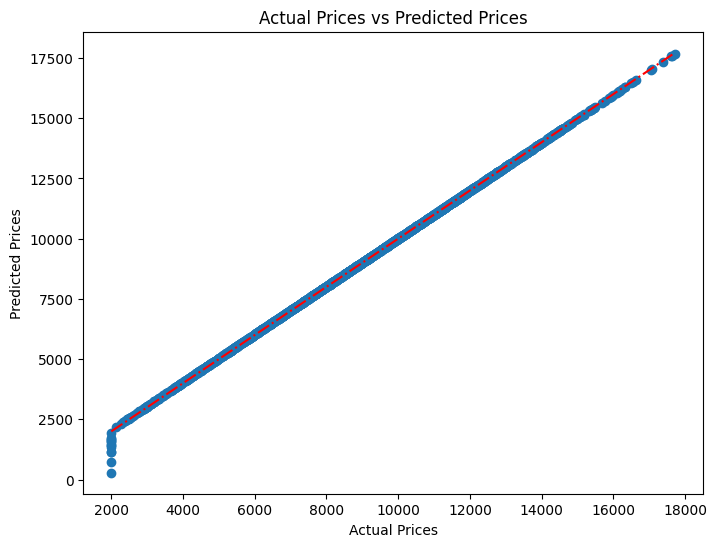

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linestyle='-.')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

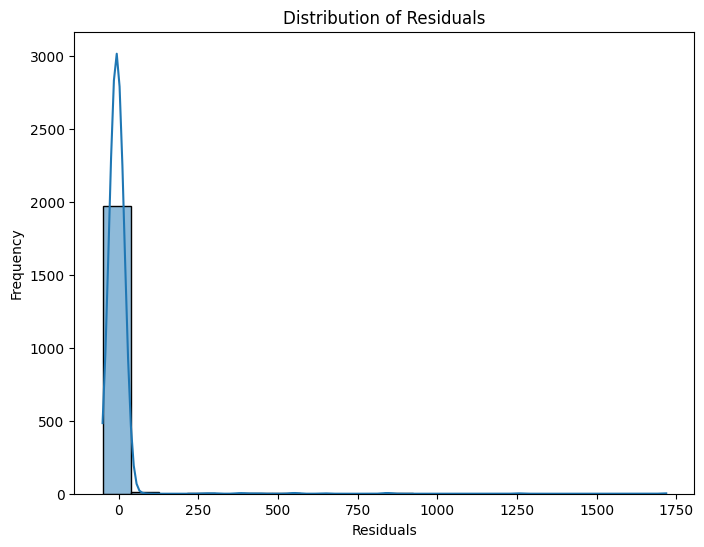

In [105]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()